# Surprise Housing Regression Model

## Key Steps:
### 1. Data understanding and handling of quality issues
### 2. Data Handling & Encoding
### 3. Data analysis and visualization
### 4. Model building, evaluation, assess overfitting & apply regularization
### 5. Selection of the best model

## 1. Data understanding and handling of quality issues

In [103]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read the data
housing = pd.read_csv("train.csv")

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# First identify the Null Percentages per column in the data
#Though there are imputation techniques to handle higher percentages of missing data
#for the sake of simplicity we will consider 25% as a threshold
#Thus we will identify the columns that have more than 25% missing data
print("Null Percentages: \n")
null_cols = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 25.0:
        null_cols.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.73972602739726
LotArea 	 0.0
Street 	 0.0
Alley 	 93.76712328767123
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrType 	 59.726027397260275
MasVnrArea 	 0.547945205479452
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 2.5342465753424657
BsmtCond 	 2.5342465753424657
BsmtExposure 	 2.6027397260273974
BsmtFinType1 	 2.5342465753424657
BsmtFinSF1 	 0.0
BsmtFinType2 	 2.6027397260273974
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0684931506849315
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 

In [7]:
null_cols

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
# Drop the columns with high % of null values 
housing = housing.drop(null_cols,axis=1)

In [9]:
housing.shape

(1460, 75)

In [10]:
print("Null Percentages: \n")
cols_for_impute = []
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)
    if null_percent > 0 and null_percent < 25:
        cols_for_impute.append(col)

Null Percentages: 

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 17.73972602739726
LotArea 	 0.0
Street 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrArea 	 0.547945205479452
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 2.5342465753424657
BsmtCond 	 2.5342465753424657
BsmtExposure 	 2.6027397260273974
BsmtFinType1 	 2.5342465753424657
BsmtFinSF1 	 0.0
BsmtFinType2 	 2.6027397260273974
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0684931506849315
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
KitchenQual 	 0.

### Missing data imputation

In [11]:
cols_for_impute

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [12]:
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Based on the above the LotFrontage may depend on the LotArea

In [13]:
#Lets check the relation between these two
lot_df = housing[["LotFrontage","LotArea"]]
lot_df = lot_df[lot_df["LotFrontage"].isnull() == False]
lot_df.corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [14]:
# LotFrontage has a moderate correlation with LotArea ... thus it is a case of Missing At Random
# Lets use KNN Imputer to impute the missing values in LotFrontage
# we will use value of 2 for number of neighbours
imputer = KNNImputer(n_neighbors= 2)
impute_with_2 = imputer.fit_transform(housing.LotFrontage.array.reshape(-1, 1))
print(housing.LotFrontage.describe())
impute_df = pd.DataFrame(impute_with_2)
print(impute_df.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
                 0
count  1460.000000
mean     70.049958
std      22.024023
min      21.000000
25%      60.000000
50%      70.049958
75%      79.000000
max     313.000000


#### As observed above, there is a minimal change in the quantile values for the LotFrontage after the imputation using KNN Imputer.
#### We can therefore use this as the imputation for the missing values

In [15]:
housing.LotFrontage = imputer.fit_transform(housing.LotFrontage.array.reshape(-1, 1))
print(housing.LotFrontage.describe())

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [16]:
for i in cols_for_impute:
    print(housing[i].isnull().value_counts())

LotFrontage
False    1460
Name: count, dtype: int64
MasVnrArea
False    1452
True        8
Name: count, dtype: int64
BsmtQual
False    1423
True       37
Name: count, dtype: int64
BsmtCond
False    1423
True       37
Name: count, dtype: int64
BsmtExposure
False    1422
True       38
Name: count, dtype: int64
BsmtFinType1
False    1423
True       37
Name: count, dtype: int64
BsmtFinType2
False    1422
True       38
Name: count, dtype: int64
Electrical
False    1459
True        1
Name: count, dtype: int64
GarageType
False    1379
True       81
Name: count, dtype: int64
GarageYrBlt
False    1379
True       81
Name: count, dtype: int64
GarageFinish
False    1379
True       81
Name: count, dtype: int64
GarageQual
False    1379
True       81
Name: count, dtype: int64
GarageCond
False    1379
True       81
Name: count, dtype: int64


In [17]:
#Electrical has only one missing value - we will drop this row
housing = housing[housing['Electrical'].isnull()==False]
housing.shape

(1459, 75)

In [18]:
#MasVnrArea 
housing.MasVnrArea.describe()

count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
25%         0.00000
50%         0.00000
75%       166.00000
max      1600.00000
Name: MasVnrArea, dtype: float64

In [19]:
#As per the above the median is at zero , which means more than 50% of the data samples have a value 0 indicating a skewness
#It is therefore better to drop the rows as it is a small % of rows
housing = housing[housing['MasVnrArea'].isnull()==False]
housing.shape

(1451, 75)

In [20]:
cols_for_impute.remove('LotFrontage')
cols_for_impute.remove('MasVnrArea')
cols_for_impute.remove('Electrical')

In [21]:
for i in cols_for_impute:
    print(housing[i].isnull().value_counts())

BsmtQual
False    1414
True       37
Name: count, dtype: int64
BsmtCond
False    1414
True       37
Name: count, dtype: int64
BsmtExposure
False    1413
True       38
Name: count, dtype: int64
BsmtFinType1
False    1414
True       37
Name: count, dtype: int64
BsmtFinType2
False    1413
True       38
Name: count, dtype: int64
GarageType
False    1370
True       81
Name: count, dtype: int64
GarageYrBlt
False    1370
True       81
Name: count, dtype: int64
GarageFinish
False    1370
True       81
Name: count, dtype: int64
GarageQual
False    1370
True       81
Name: count, dtype: int64
GarageCond
False    1370
True       81
Name: count, dtype: int64


In [22]:
# Except for GarageYrBlt all other variables are categorical in nature
housing.GarageYrBlt.value_counts()

GarageYrBlt
2005.0    65
2006.0    58
2004.0    53
2003.0    49
2007.0    45
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [23]:
housing.SalePrice.describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
df_SalePrice = pd.DataFrame(housing.SalePrice.describe())
df_SalePrice["Sale_Price_GarageNotNull"] = housing[housing["GarageCond"].isnull() == False].SalePrice.describe()

In [25]:
df_SalePrice["Diff_Percent"] =  ((df_SalePrice.SalePrice - df_SalePrice.Sale_Price_GarageNotNull)/df_SalePrice.SalePrice)*100

In [26]:
df_SalePrice

,SalePrice,Sale_Price_GarageNotNull,Diff_Percent
count,1451.000000,1370.000000,5.582357
mean,180624.101999,185194.797080,-2.530501
std,79312.128273,78899.705642,0.519999
min,34900.000000,35311.000000,-1.177650
25%,129900.000000,133925.000000,-3.098537
50%,162500.000000,167000.000000,-2.769231
75%,214000.000000,217875.000000,-1.810748
max,755000.000000,755000.000000,0.000000


#### As observed above - considering only the samples wit Non Null values of the GarageCond as against all samples - causes only a minor variance in the mean, std dev and quantiles for the target variable SalePrice
#### As the variance is very small we will proceed to drop the rows with GarageCond as null

In [27]:
housing = housing[housing["GarageCond"].isnull() == False]
housing.shape

(1370, 75)

In [28]:
for i in cols_for_impute:
    print(housing[i].isnull().value_counts())

BsmtQual
False    1340
True       30
Name: count, dtype: int64
BsmtCond
False    1340
True       30
Name: count, dtype: int64
BsmtExposure
False    1339
True       31
Name: count, dtype: int64
BsmtFinType1
False    1340
True       30
Name: count, dtype: int64
BsmtFinType2
False    1339
True       31
Name: count, dtype: int64
GarageType
False    1370
Name: count, dtype: int64
GarageYrBlt
False    1370
Name: count, dtype: int64
GarageFinish
False    1370
Name: count, dtype: int64
GarageQual
False    1370
Name: count, dtype: int64
GarageCond
False    1370
Name: count, dtype: int64


In [29]:
df_SalePrice = pd.DataFrame(housing.SalePrice.describe())
df_SalePrice["Sale_Price_BsmtNotNull"] = housing[housing["BsmtExposure"].isnull() == False].SalePrice.describe()
df_SalePrice["Diff_Percent"] =  ((df_SalePrice.SalePrice - df_SalePrice.Sale_Price_BsmtNotNull)/df_SalePrice.SalePrice)*100
df_SalePrice

,SalePrice,Sale_Price_BsmtNotNull,Diff_Percent
count,1370.000000,1339.000000,2.262774
mean,185194.797080,186834.402539,-0.885341
std,78899.705642,78929.098178,-0.037253
min,35311.000000,35311.000000,0.000000
25%,133925.000000,135000.000000,-0.802688
50%,167000.000000,168500.000000,-0.898204
75%,217875.000000,220000.000000,-0.975330
max,755000.000000,755000.000000,0.000000


#### As observed above - considering only the samples wit Non Null values of the BsmtExposure as against all samples - causes only a minor variance in the mean, std dev and quantiles for the target variable SalePrice - which means those samples with null values are not impacting the SalePrice too significantly
#### As the variance is very small we will proceed to drop the rows with BsmtExposure as null

In [30]:
housing = housing[housing["BsmtExposure"].isnull() == False]
housing.shape

(1339, 75)

In [31]:
print("Null Percentages\n")
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)

Null Percentages

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 0.0
LotArea 	 0.0
Street 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 0.0
BsmtCond 	 0.0
BsmtExposure 	 0.0
BsmtFinType1 	 0.0
BsmtFinSF1 	 0.0
BsmtFinType2 	 0.07468259895444362
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
KitchenQual 	 0.0
TotRmsAbvGrd 	 0.0
Functional 	 0.0
Fireplaces 	 0.0
GarageType 	 0.0
GarageYrBlt 	 0.0
GarageFinish 	

In [32]:
housing = housing[housing["BsmtFinType2"].isnull() == False]
housing.shape

(1338, 75)

In [33]:
print("Null Percentages\n")
for col in housing.columns:
    null_percent = (housing[col].isnull().sum() / len(housing)) * 100
    print(col,"\t", null_percent)

Null Percentages

Id 	 0.0
MSSubClass 	 0.0
MSZoning 	 0.0
LotFrontage 	 0.0
LotArea 	 0.0
Street 	 0.0
LotShape 	 0.0
LandContour 	 0.0
Utilities 	 0.0
LotConfig 	 0.0
LandSlope 	 0.0
Neighborhood 	 0.0
Condition1 	 0.0
Condition2 	 0.0
BldgType 	 0.0
HouseStyle 	 0.0
OverallQual 	 0.0
OverallCond 	 0.0
YearBuilt 	 0.0
YearRemodAdd 	 0.0
RoofStyle 	 0.0
RoofMatl 	 0.0
Exterior1st 	 0.0
Exterior2nd 	 0.0
MasVnrArea 	 0.0
ExterQual 	 0.0
ExterCond 	 0.0
Foundation 	 0.0
BsmtQual 	 0.0
BsmtCond 	 0.0
BsmtExposure 	 0.0
BsmtFinType1 	 0.0
BsmtFinSF1 	 0.0
BsmtFinType2 	 0.0
BsmtFinSF2 	 0.0
BsmtUnfSF 	 0.0
TotalBsmtSF 	 0.0
Heating 	 0.0
HeatingQC 	 0.0
CentralAir 	 0.0
Electrical 	 0.0
1stFlrSF 	 0.0
2ndFlrSF 	 0.0
LowQualFinSF 	 0.0
GrLivArea 	 0.0
BsmtFullBath 	 0.0
BsmtHalfBath 	 0.0
FullBath 	 0.0
HalfBath 	 0.0
BedroomAbvGr 	 0.0
KitchenAbvGr 	 0.0
KitchenQual 	 0.0
TotRmsAbvGrd 	 0.0
Functional 	 0.0
Fireplaces 	 0.0
GarageType 	 0.0
GarageYrBlt 	 0.0
GarageFinish 	 0.0
GarageCars 

#### We now have a dataframe with no missing values

### 2. Data Handling & Encoding as required

In [35]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [36]:
# Lets list out the variables by types
nominal_cat_cols = ['MSSubClass','MSZoning','Street','LandContour','LotConfig','Neighborhood','Condition1',
                    'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                   'Foundation','Heating','Electrical','GarageType','SaleType','SaleCondition']

ordinal_cat_cols = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',
                   'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive','OverallQual','OverallCond']

numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
               'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

time_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

### For the ordinal categorical variables we perform Ordinal Encoding

In [38]:
# Define the Categories per Ordinal Categorical Column
for col_name in ordinal_cat_cols:
    print(housing[col_name].value_counts())

LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
Utilities
AllPub    1337
NoSeWa       1
Name: count, dtype: int64
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: count, dtype: int64
ExterQual
TA    803
Gd    477
Ex     51
Fa      7
Name: count, dtype: int64
ExterCond
TA    1183
Gd     137
Fa      16
Ex       2
Name: count, dtype: int64
BsmtQual
TA    594
Gd    592
Ex    120
Fa     32
Name: count, dtype: int64
BsmtCond
TA    1237
Gd      62
Fa      38
Po       1
Name: count, dtype: int64
BsmtExposure
No    887
Av    213
Gd    127
Mn    111
Name: count, dtype: int64
BsmtFinType1
GLQ    402
Unf    392
ALQ    209
BLQ    141
Rec    125
LwQ     69
Name: count, dtype: int64
BsmtFinType2
Unf    1176
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: count, dtype: int64
HeatingQC
Ex    704
TA    380
Gd    217
Fa     36
Po      1
Name: count, dtype: int64
CentralAir
Y    1277
N      61
Name: count, dtype: int64
KitchenQual
TA    650
Gd    568
Ex 

In [40]:
#OverallQual and OverallCond are already ordinally encoded
ordinal_cat_cols_enc = ordinal_cat_cols
ordinal_cat_cols_enc.remove('OverallQual')
ordinal_cat_cols_enc.remove('OverallCond')
ordinal_cat_cols_enc

['LotShape',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [42]:
#List the categories for the ordinal categorical variables
mapping = [{'IR3':0,'IR2':1,'IR1':2,'Reg':3},
            {'NoSeWa':0,'AllPub':1},
             {'Sev':0,'Mod':1,'Gtl':2},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
             {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4},
             {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
             {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'N':0,'Y':1},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'Sev':0,'Maj2':1,'Maj1':2,'Mod':3,'Min2':4,'Min1':5,'Typ':6},
             {'Unf':0,'RFn':1,'Fin':2},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
             {'N':0,'P':1,'Y':2}]

In [43]:
housing_enc = housing.copy()
i=0
for col in ordinal_cat_cols_enc:
    housing_enc[col] = housing_enc[col].map(mapping[i])
    i=i+1

In [44]:
for col_name in ordinal_cat_cols:
    print(housing_enc[col_name].value_counts())

LotShape
3    829
2    459
1     40
0     10
Name: count, dtype: int64
Utilities
1    1337
0       1
Name: count, dtype: int64
LandSlope
2    1265
1      61
0      12
Name: count, dtype: int64
ExterQual
2    803
3    477
4     51
1      7
Name: count, dtype: int64
ExterCond
2    1183
3     137
1      16
4       2
Name: count, dtype: int64
BsmtQual
3    594
4    592
5    120
2     32
Name: count, dtype: int64
BsmtCond
3    1237
4      62
2      38
1       1
Name: count, dtype: int64
BsmtExposure
1    887
3    213
4    127
2    111
Name: count, dtype: int64
BsmtFinType1
6    402
1    392
5    209
4    141
3    125
2     69
Name: count, dtype: int64
BsmtFinType2
1    1176
3      53
2      46
4      32
5      19
6      12
Name: count, dtype: int64
HeatingQC
4    704
2    380
3    217
1     36
0      1
Name: count, dtype: int64
CentralAir
1    1277
0      61
Name: count, dtype: int64
KitchenQual
2    650
3    568
4     97
1     23
Name: count, dtype: int64
Functional
6    1254
4      30
5  

### For the nominal categorical variables we perform Label Encoding

In [45]:
for col_name in nominal_cat_cols:
    print(housing_enc[col_name].value_counts())

MSSubClass
20     502
60     294
50     129
120     86
160     61
70      57
80      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: count, dtype: int64
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Street
Pave    1333
Grvl       5
Name: count, dtype: int64
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
Condition1
No

In [48]:
# Loop over the nominal_cat_cols, perform label encoding for each column and add the encoded column in the housing_enc dataframe

encoder = LabelEncoder()
for col_name in nominal_cat_cols:
    enc_col_name = col_name + '_enc'
    housing_enc[enc_col_name] = encoder.fit_transform(housing_enc[col_name])
housing_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,RoofStyle_enc,RoofMatl_enc,Exterior1st_enc,Exterior2nd_enc,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc
0,1,60,RL,65.0,8450,Pave,3,Lvl,1,Inside,...,1,1,11,13,2,0,4,1,8,4
1,2,20,RL,80.0,9600,Pave,3,Lvl,1,FR2,...,1,1,7,8,1,0,4,1,8,4
2,3,60,RL,68.0,11250,Pave,2,Lvl,1,Inside,...,1,1,11,13,2,0,4,1,8,4
3,4,70,RL,60.0,9550,Pave,2,Lvl,1,Corner,...,1,1,12,15,0,0,4,5,8,0
4,5,60,RL,84.0,14260,Pave,2,Lvl,1,FR2,...,1,1,11,13,2,0,4,1,8,4


In [49]:
#As the encoded columns have been added, we can now drop the original columns in the list nominal_cat_cols
len(nominal_cat_cols)

20

In [50]:
housing_enc = housing_enc.drop(nominal_cat_cols,axis=1)

In [51]:
housing_enc.shape

(1338, 75)

In [52]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,RoofStyle_enc,RoofMatl_enc,Exterior1st_enc,Exterior2nd_enc,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,1,1,11,13,2,0,4,1,8,4
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,1,1,7,8,1,0,4,1,8,4
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,1,1,11,13,2,0,4,1,8,4
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,1,1,12,15,0,0,4,5,8,0
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,1,1,11,13,2,0,4,1,8,4


### For the time based features we will derive new features

In [53]:
print(time_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


In [54]:
import datetime

current_year = datetime.datetime.now().year

housing_enc["HouseAge"] = housing_enc.YearBuilt.apply(lambda x: int(current_year - x))
housing_enc["RemodelAge"] = housing_enc.YearRemodAdd.apply(lambda x: int(current_year - x))
housing_enc["GarageAge"] = housing_enc.GarageYrBlt.apply(lambda x: int(current_year - x))

In [55]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_enc,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,13,2,0,4,1,8,4,21,21,21
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,8,1,0,4,1,8,4,48,48,48
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,13,2,0,4,1,8,4,23,22,23
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,15,0,0,4,5,8,0,109,54,26
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,13,2,0,4,1,8,4,24,24,24


In [56]:
def getDateDiff(row):
    # Convert month and year to a date
    row_date = datetime.datetime(int(row["YrSold"]), int(row["MoSold"]), 1)
    # Get the current date
    current_date = datetime.datetime.now()
    # Calculate the difference 
    date_difference = current_date - row_date
    return date_difference.days

housing_enc["DaysSinceSale"] = housing_enc.apply(getDateDiff, axis=1)

In [57]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,2003,2003,...,2,0,4,1,8,4,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,1976,1976,...,1,0,4,1,8,4,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,2001,2002,...,2,0,4,1,8,4,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,1915,1970,...,0,0,4,5,8,0,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,2000,2000,...,2,0,4,1,8,4,24,24,24,5648


In [58]:
#Now , as we have derived the new features, we will drop the time columns
housing_enc = housing_enc.drop(time_cols, axis=1)

In [59]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,2,0,4,1,8,4,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,0,4,1,8,4,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,2,0,4,1,8,4,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,0,0,4,5,8,0,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,2,0,4,1,8,4,24,24,24,5648


In [60]:
housing_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1338 non-null   int64  
 1   LotFrontage        1338 non-null   float64
 2   LotArea            1338 non-null   int64  
 3   LotShape           1338 non-null   int64  
 4   Utilities          1338 non-null   int64  
 5   LandSlope          1338 non-null   int64  
 6   OverallQual        1338 non-null   int64  
 7   OverallCond        1338 non-null   int64  
 8   MasVnrArea         1338 non-null   float64
 9   ExterQual          1338 non-null   int64  
 10  ExterCond          1338 non-null   int64  
 11  BsmtQual           1338 non-null   int64  
 12  BsmtCond           1338 non-null   int64  
 13  BsmtExposure       1338 non-null   int64  
 14  BsmtFinType1       1338 non-null   int64  
 15  BsmtFinSF1         1338 non-null   int64  
 16  BsmtFinType2       1338 non-n

### As seen above, all the features have numeric values. With this we have completed the data handling and encoding and we can move to the next step

## 3. Data Analysis and Visualization (EDA)

In [61]:
housing_enc

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,2,0,4,1,8,4,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,0,4,1,8,4,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,2,0,4,1,8,4,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,0,0,4,5,8,0,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,2,0,4,1,8,4,24,24,24,5648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,3,1,2,6,5,0.0,2,...,2,0,4,1,8,4,25,24,25,6136
1456,1457,85.0,13175,3,1,2,6,6,119.0,2,...,1,0,4,1,8,4,46,36,46,5221
1457,1458,66.0,9042,3,1,2,7,9,0.0,4,...,3,0,4,1,8,4,83,18,83,5132
1458,1459,68.0,9717,3,1,2,5,6,0.0,2,...,1,0,0,1,8,4,74,28,74,5162


In [62]:
# Define numeric_cols list by adding the newly derived cols from time_cols
numeric_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
               'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','HouseAge','RemodelAge',
                'GarageAge','DaysSinceSale']

In [63]:
len(numeric_cols)

32

<Figure size 640x480 with 0 Axes>

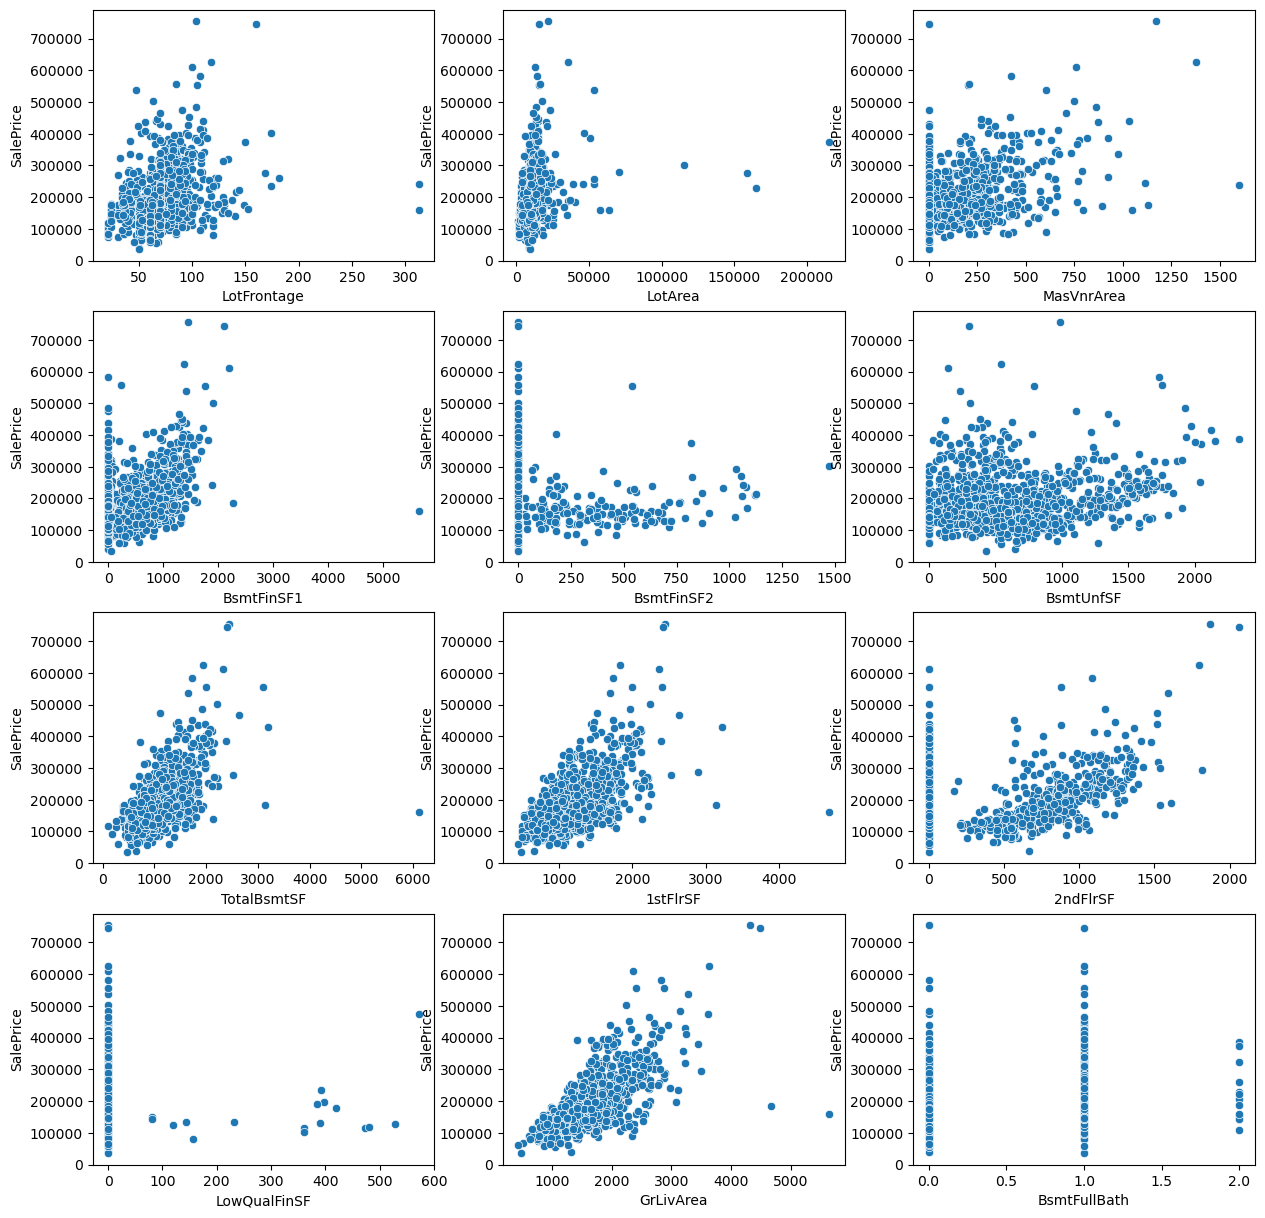

In [64]:
plt.figure()
fig1, ax = plt.subplots(4,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[0:12]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

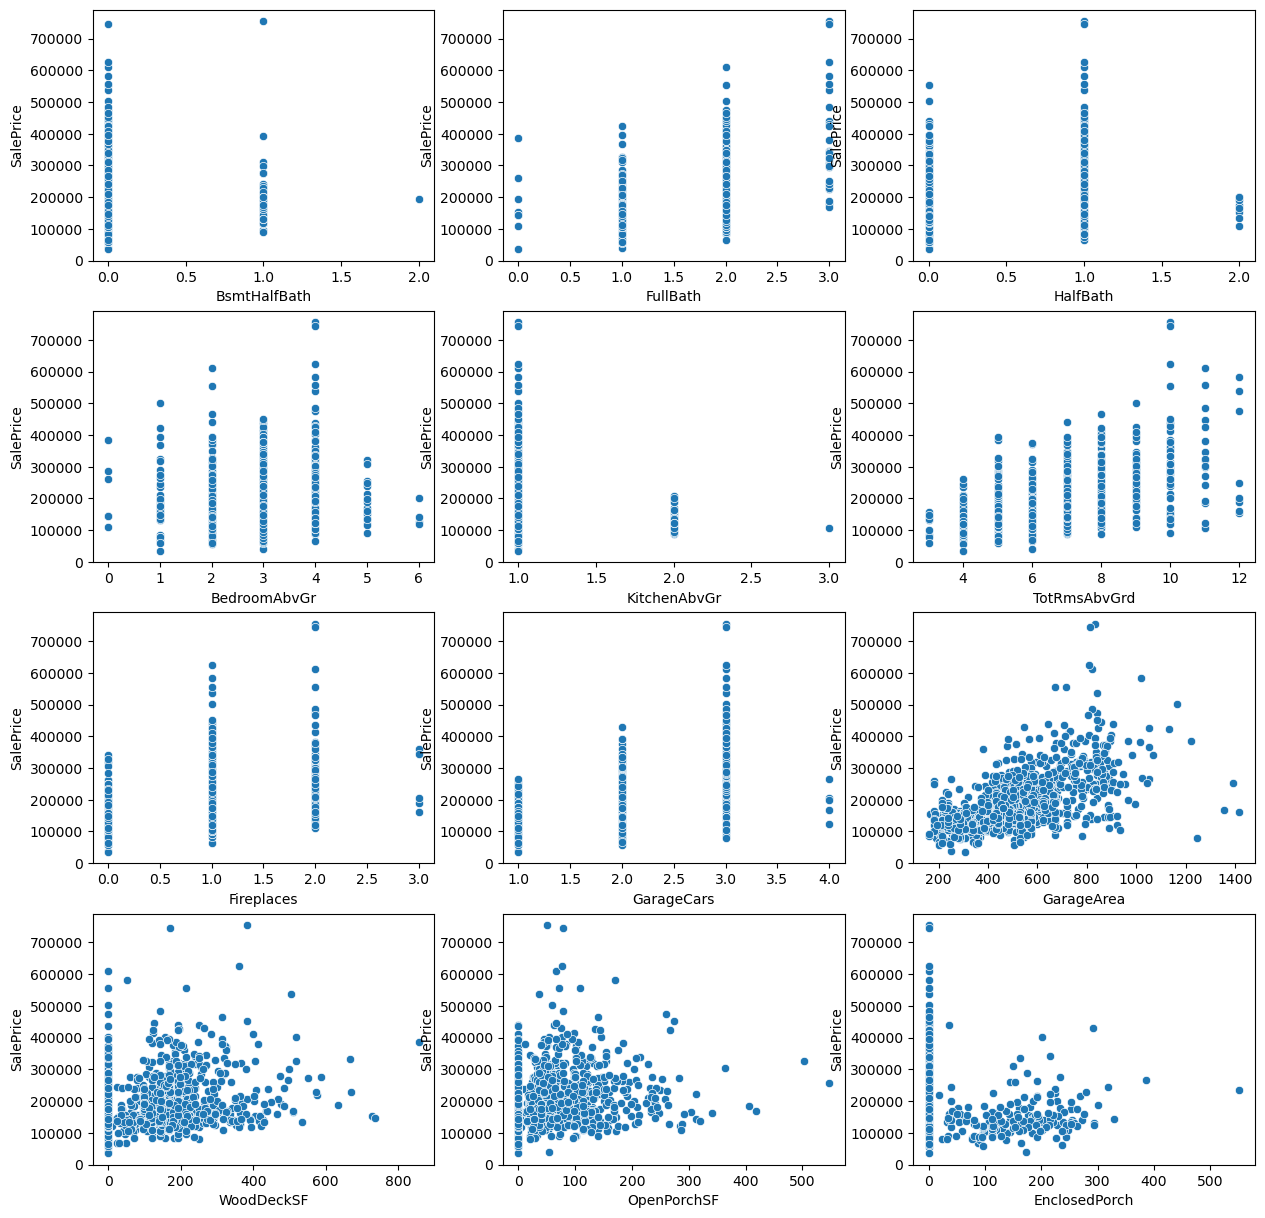

In [65]:
plt.figure()
fig1, ax = plt.subplots(4,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[12:24]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

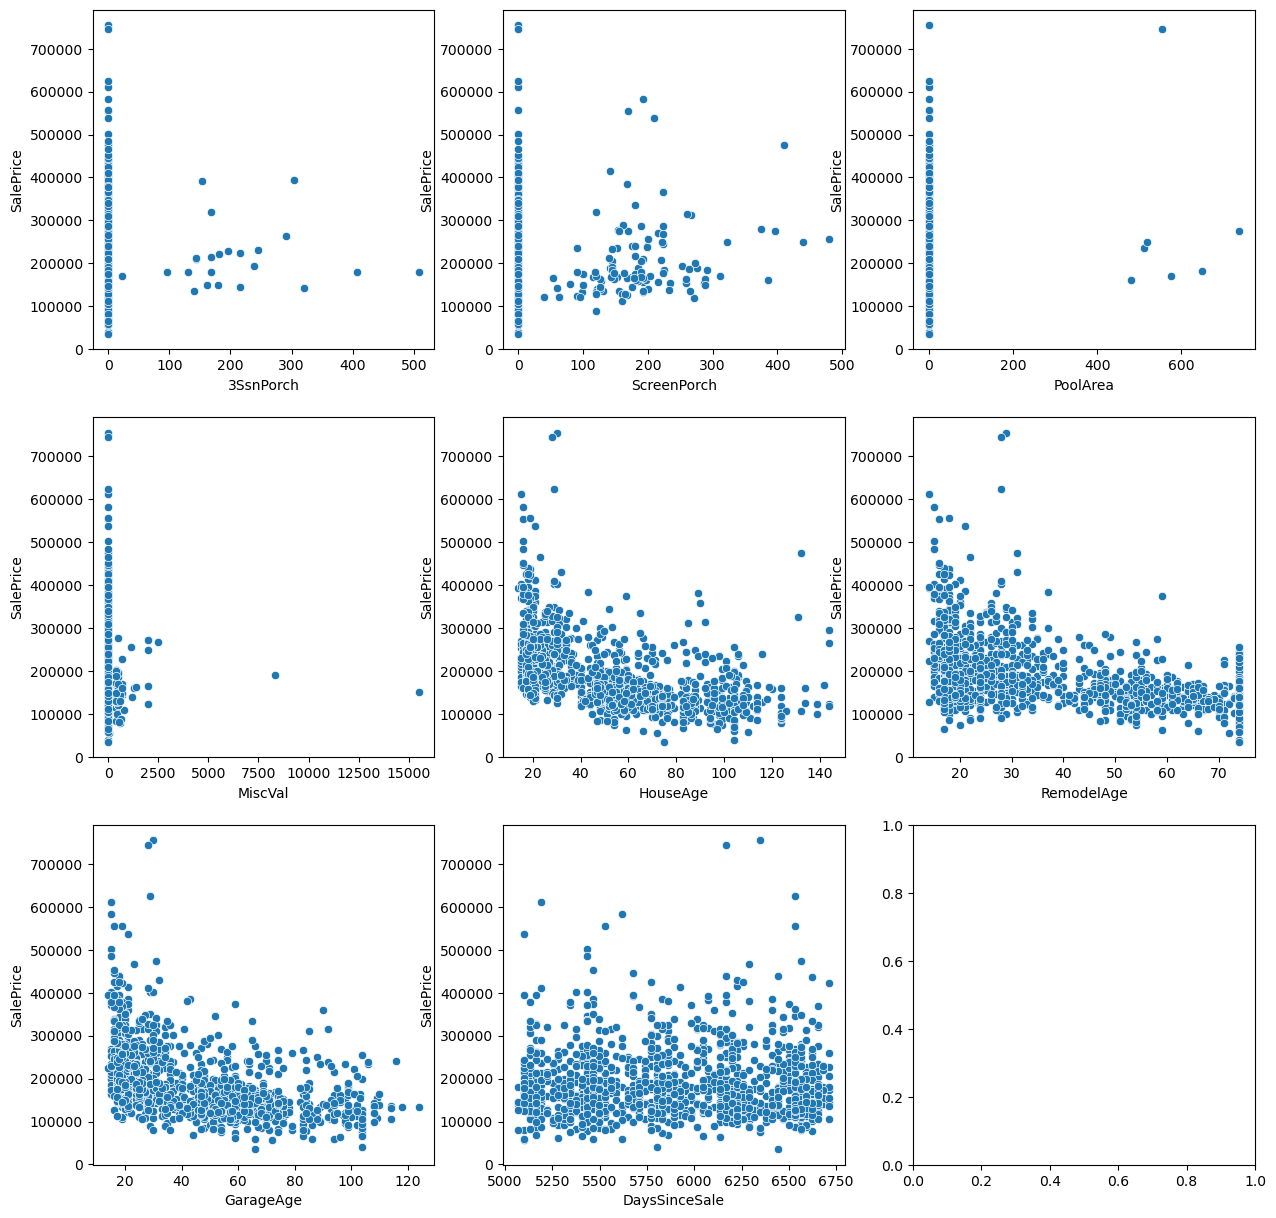

In [67]:
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(15,15)
i=0
for var in numeric_cols[24:32]:
    r=int(i/3)
    c=int(i%3)
    sns.scatterplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

- From the above plots we see that the following features have a relation with the SalePrice
    - TotalBsmtSF
    - 1stFlrSF
    - GrLivArea
    - GarageArea
    - GarageAge
    - HouseAge

In [68]:
#Lets check the correlation matrix and heatmap between SalePrice and the above features
housing_num = housing_enc[['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','GarageAge','HouseAge','SalePrice']]
housing_num.corr()

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageAge,HouseAge,SalePrice
TotalBsmtSF,1.000000,0.893110,0.460778,0.511475,-0.321500,-0.385146,0.602042
1stFlrSF,0.893110,1.000000,0.554846,0.500071,-0.237928,-0.263585,0.604714
GrLivArea,0.460778,0.554846,1.000000,0.477868,-0.224903,-0.189146,0.711706
GarageArea,0.511475,0.500071,0.477868,1.000000,-0.563860,-0.443854,0.607535
GarageAge,-0.321500,-0.237928,-0.224903,-0.563860,1.000000,0.825172,-0.481730
HouseAge,-0.385146,-0.263585,-0.189146,-0.443854,0.825172,1.000000,-0.504297
SalePrice,0.602042,0.604714,0.711706,0.607535,-0.481730,-0.504297,1.000000


<Axes: >

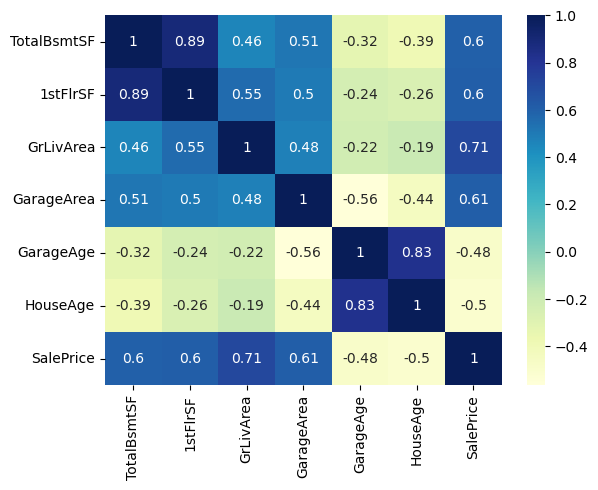

In [69]:
sns.heatmap(data=housing_num.corr(),cmap="YlGnBu",annot=True)

- Observations from above heatmap
    - The feature  GrLivArea shows a strong positive correlation with the SalePrice
    - The features TotalBsmtSF, 1stFlrSF, GarageArea exhibit a moderate positive correlation with the SalePrice
    - The features HouseAge and GarageAge show a moderate negative correlation with the SalePrice

#### Lets analyse the relation between ordinal categorical columns and the SalePrice

In [70]:
ordinal_cat_cols

['LotShape',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [71]:
len(ordinal_cat_cols)

18

<Figure size 640x480 with 0 Axes>

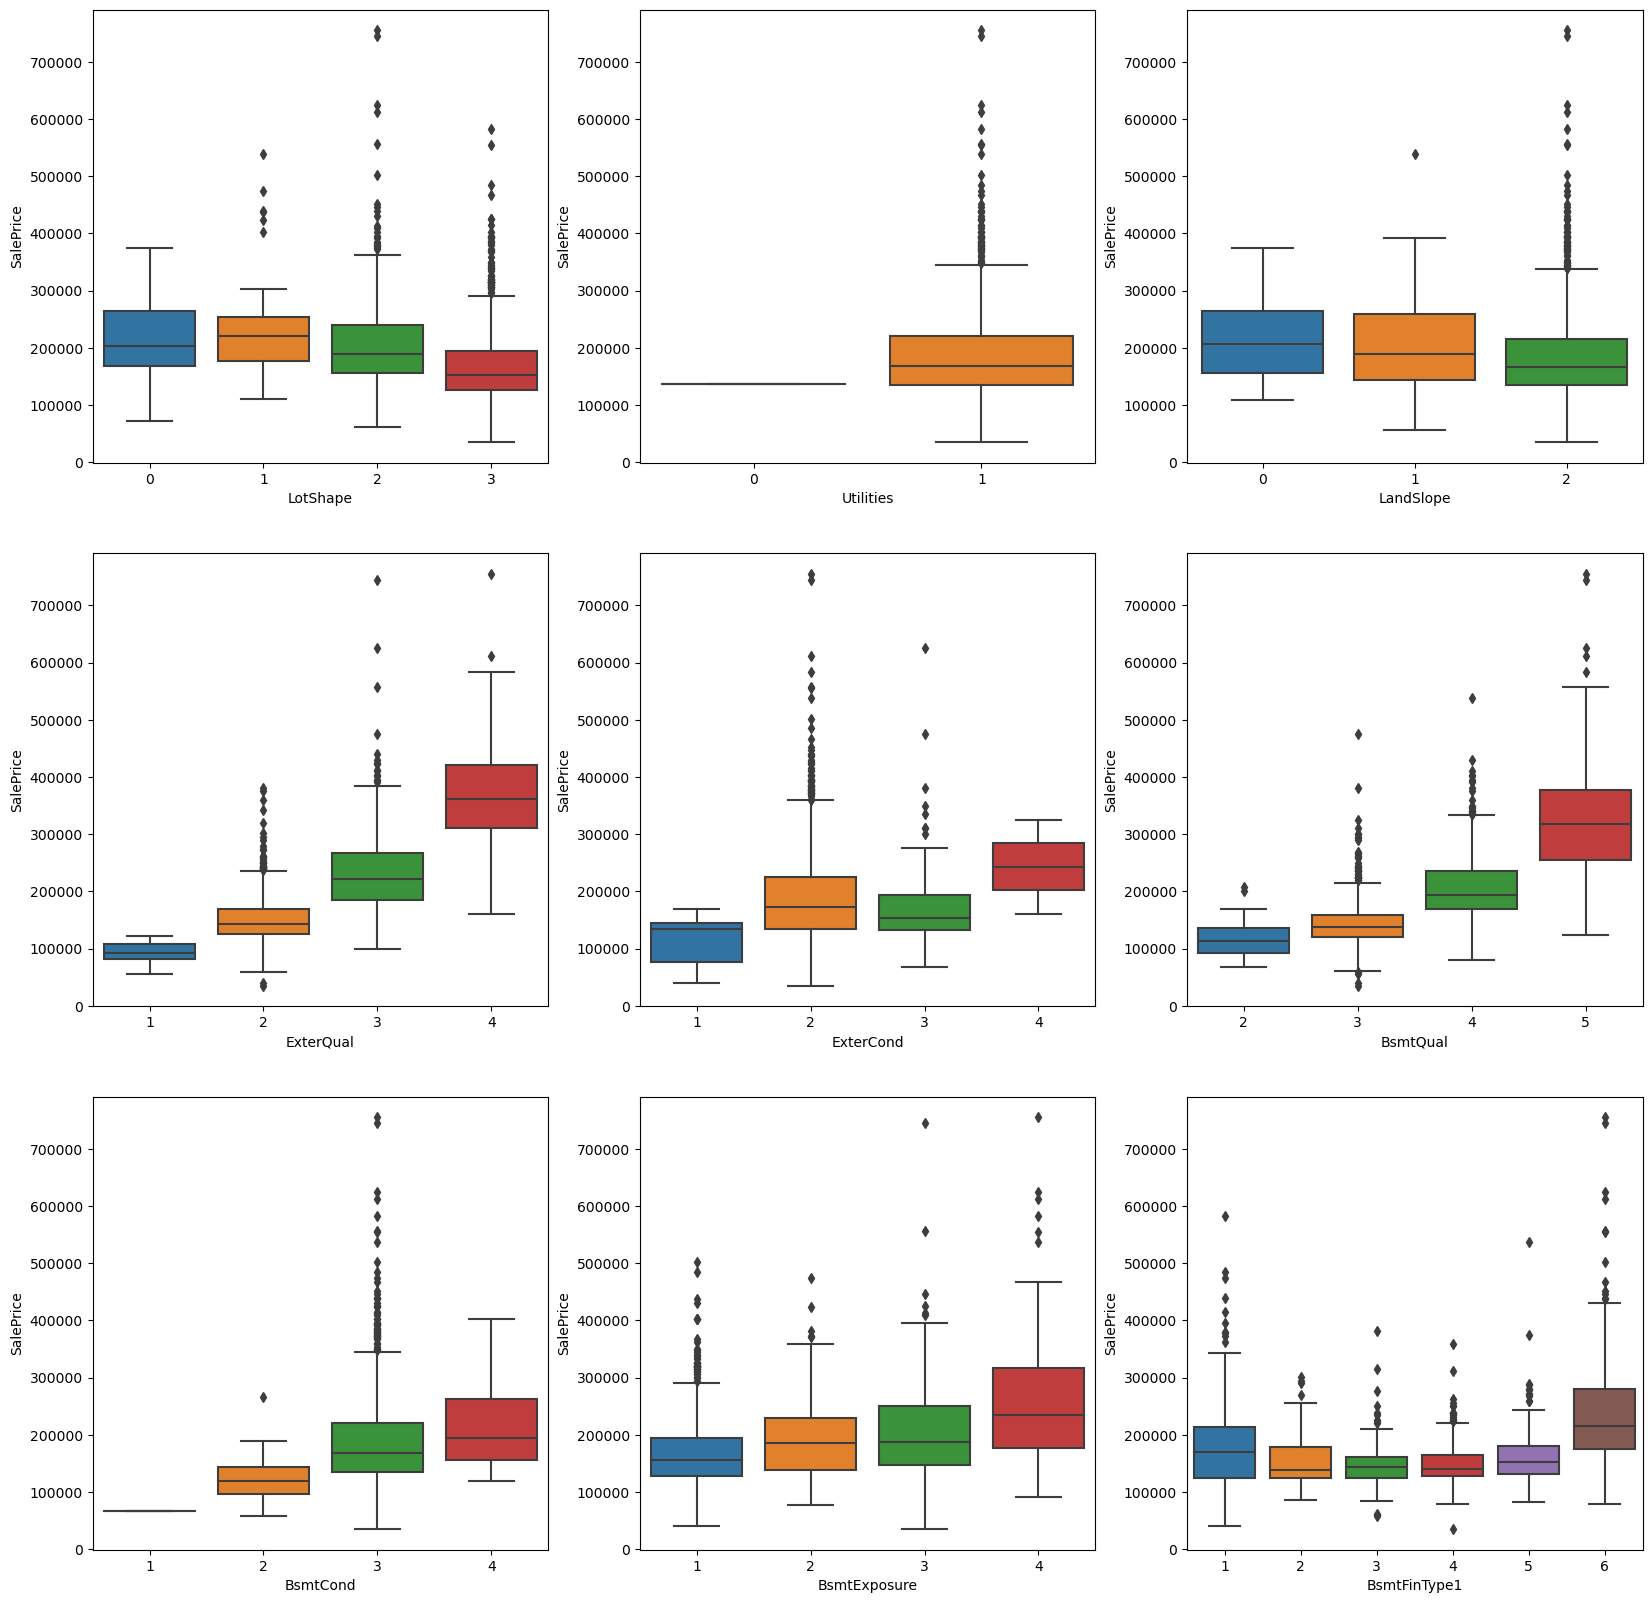

In [72]:
# For the categorical & binary columns lets plot the box plots vs cnt
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in ordinal_cat_cols[0:9]:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

<Figure size 640x480 with 0 Axes>

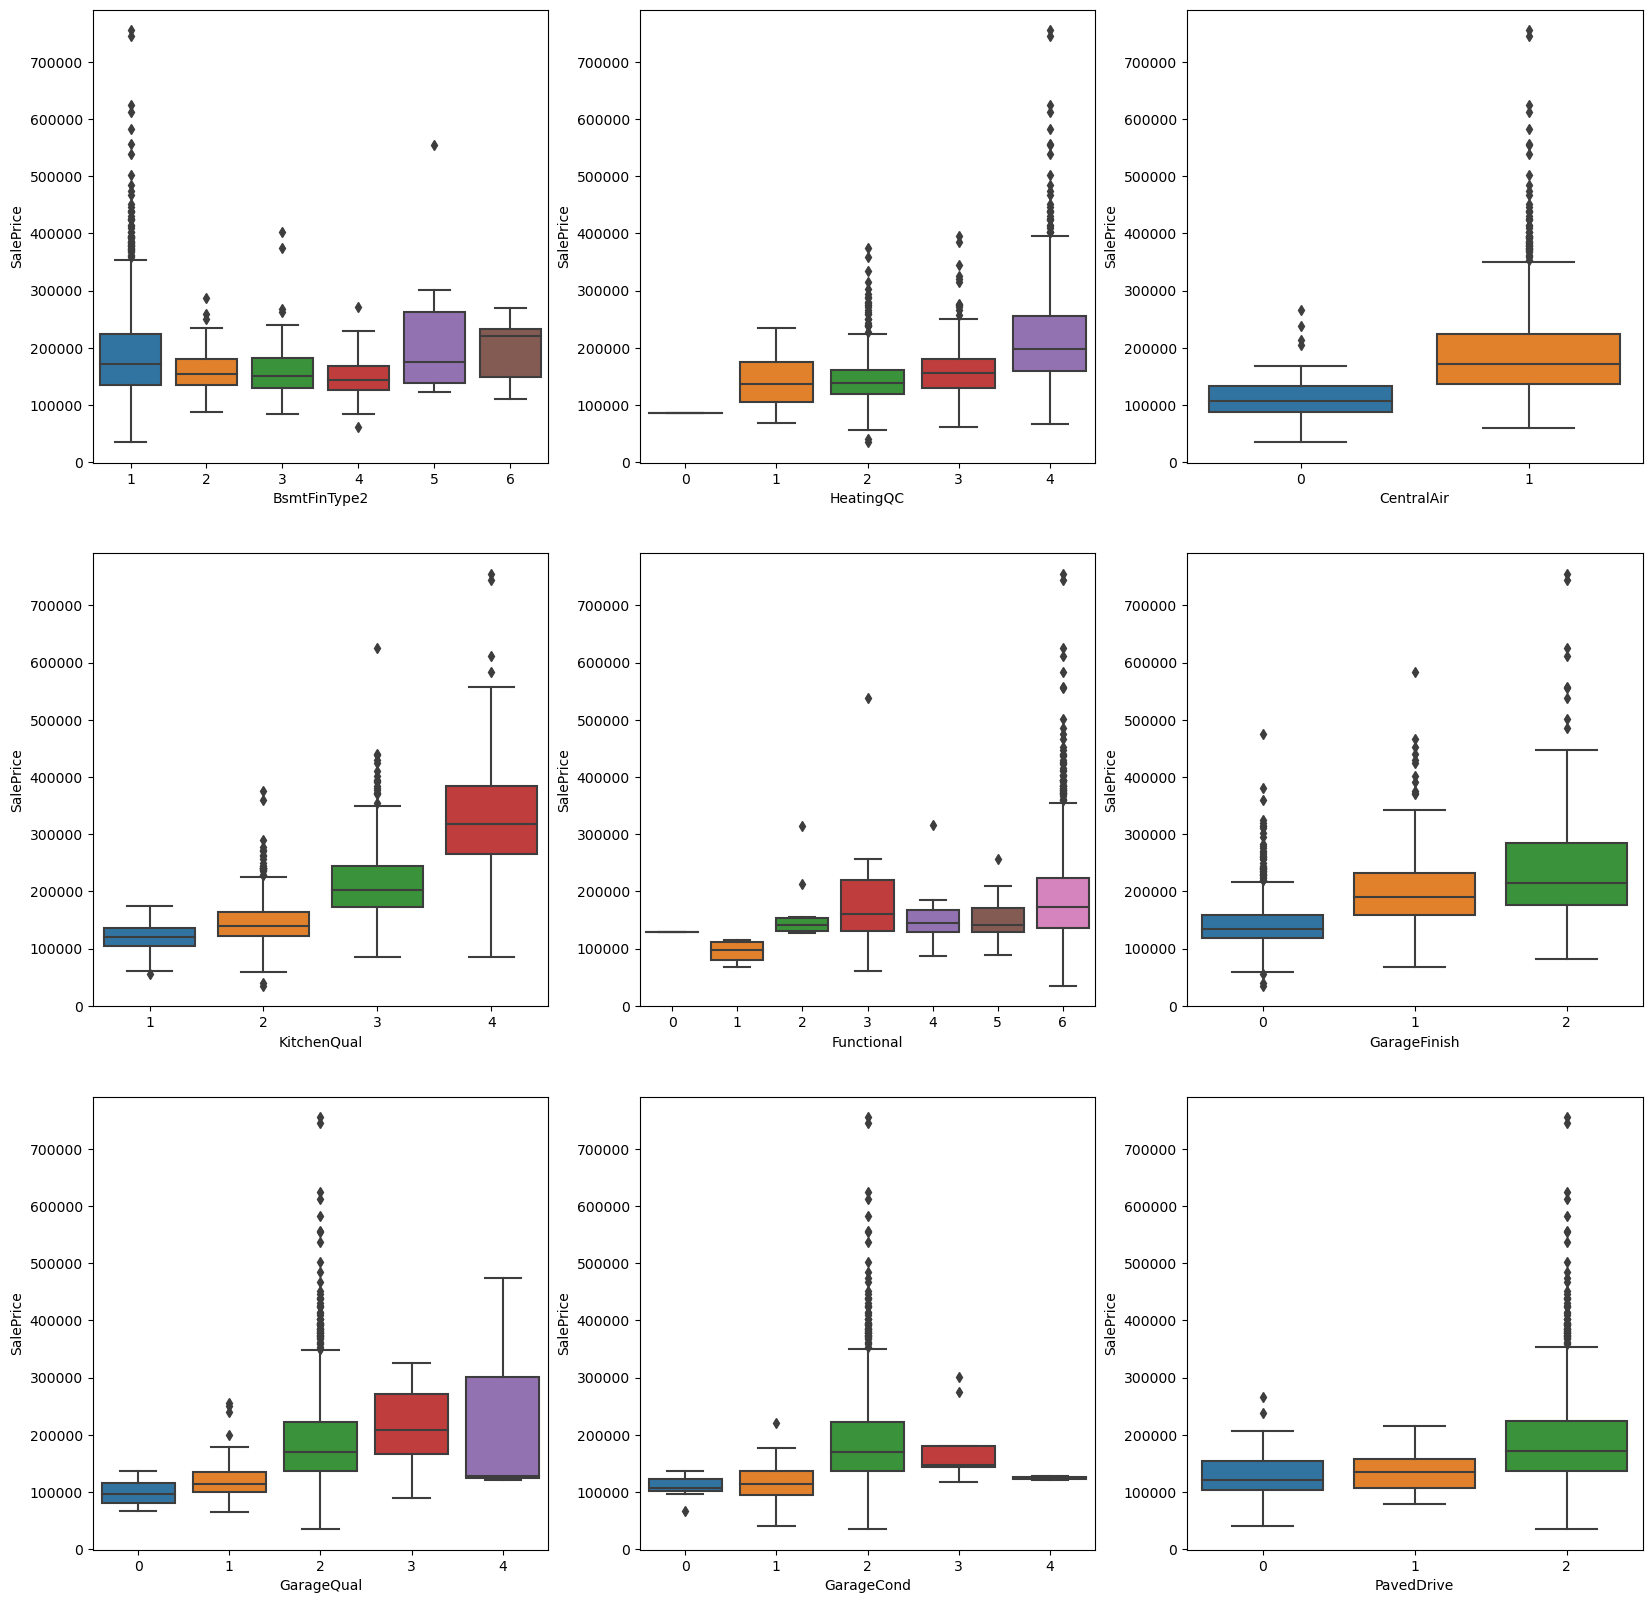

In [73]:
# For the categorical & binary columns lets plot the box plots vs cnt
plt.figure()
fig1, ax = plt.subplots(3,3)
fig1.set_size_inches(20,20)
i=0
for var in ordinal_cat_cols[9:18]:
    r=int(i/3)
    c=int(i%3)
    sns.boxplot(ax=ax[r][c],x=var,y='SalePrice',data=housing_enc)
    i=i+1
plt.show()

#### Observations from above plots
- The below features show an increasing trend of median SalePrice with an increase in the order of feature value
    - ExterQual
    - BsmtQual
    - BsmtCond
    - BsmtExposure
    - HeatingQC
    - KitchenQual
    - GarageFinish
    - PavedDrive
- Houses with Utilities have a higher median SalePrice
- Houses with Central Air Conditioning have a higher median SalePrice
- Increase in land slope severity shows a decline in the median SalePrice

## 4. Model building, evaluation & apply regularization

### Key Steps
#### 1. Split the data in train and test
#### 2. Perform scaling for numerical features
#### 3. Fit a base model on train data including all features
#### 4. Assess the accuracy for base model
#### 5. Apply ridge regression with CV
#### 6. Apply lasso regression with CV
#### 7. Check the assumptions of linear regression like normality of errors, linearity, homoscedasticity

#### <font color='blue'>4.1. Split the data in train and test</font>

In [186]:
housing_enc.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
0,1,65.0,8450,3,1,2,7,5,196.0,3,...,2,0,4,1,8,4,21,21,21,5952
1,2,80.0,9600,3,1,2,6,8,0.0,2,...,1,0,4,1,8,4,48,48,48,6228
2,3,68.0,11250,2,1,2,7,5,162.0,3,...,2,0,4,1,8,4,23,22,23,5739
3,4,60.0,9550,2,1,2,7,5,0.0,2,...,0,0,4,5,8,0,109,54,26,6682
4,5,84.0,14260,2,1,2,8,5,350.0,3,...,2,0,4,1,8,4,24,24,24,5648


In [188]:
housing_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1338 non-null   int64  
 1   LotFrontage        1338 non-null   float64
 2   LotArea            1338 non-null   int64  
 3   LotShape           1338 non-null   int64  
 4   Utilities          1338 non-null   int64  
 5   LandSlope          1338 non-null   int64  
 6   OverallQual        1338 non-null   int64  
 7   OverallCond        1338 non-null   int64  
 8   MasVnrArea         1338 non-null   float64
 9   ExterQual          1338 non-null   int64  
 10  ExterCond          1338 non-null   int64  
 11  BsmtQual           1338 non-null   int64  
 12  BsmtCond           1338 non-null   int64  
 13  BsmtExposure       1338 non-null   int64  
 14  BsmtFinType1       1338 non-null   int64  
 15  BsmtFinSF1         1338 non-null   int64  
 16  BsmtFinType2       1338 non-n

In [190]:
print(housing_enc[numeric_cols].describe())

       LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1338.000000    1338.000000  1338.000000  1338.000000  1338.000000   
mean     70.630187   10706.294469   110.360239   464.234679    49.218236   
std      22.161578   10336.621126   185.604816   458.792420   166.196584   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7744.000000     0.000000     0.000000     0.000000   
50%      70.049958    9600.000000     0.000000   413.000000     0.000000   
75%      80.000000   11760.750000   174.000000   733.000000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000  ...   
mean    582.494768  1095.947683  1176.221973   357.141256      4.221973  ...   
std     439.950528   405.554435   386.644986   440.324982     40.712916  ..

In [191]:
#1. Split the data into train and test
df_train, df_test = train_test_split(housing_enc, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(936, 74)
(402, 74)


#### <font color='blue'>4.2. Perform scaling for numerical features</font>

In [192]:
features_to_scale = numeric_cols
features_to_scale.append("SalePrice")

In [193]:
# we will use the min max scaling
#instantiate an object
scaler = StandardScaler()

#fit the scaler on the data
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_train.head()

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
1059,1060,-0.011025,0.112935,2,1,1,6,7,1.996320,2,...,1,0,4,5,8,4,1.422182,1.774328,0.060794,0.834995
571,572,-0.506447,-0.410629,3,1,2,6,6,0.524498,2,...,1,0,4,1,8,0,0.490865,1.329227,0.789808,1.151611
173,174,0.479472,-0.030205,2,1,2,6,5,2.055624,2,...,1,0,4,1,0,4,0.421879,1.230316,0.708806,-0.125335
732,733,0.232992,0.130064,2,1,2,7,5,0.497542,3,...,2,0,4,1,8,4,-0.854371,-0.649000,-0.789721,-0.188238
1282,1283,-0.457151,-0.215703,2,1,2,5,7,-0.591498,2,...,1,0,4,5,8,4,-0.130013,-1.094101,0.060794,-1.083568


In [194]:
#transform the test data
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

In [195]:
X_train = df_train.drop('SalePrice', axis=1)
X_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass_enc', 'MSZoning_enc', 'Street_enc', 'LandContour_enc',
       'LotConfig_enc', 'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc',
       'BldgType_enc', 'HouseStyle_enc', 'RoofStyle_enc', 'RoofMatl_enc',
       'Exterior1st_enc'

In [196]:
X_train = df_train.drop('Id', axis=1)
X_train.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'MSSubClass_enc', 'MSZoning_enc', 'Street_enc',
       'LandContour_enc', 'LotConfig_enc', 'Neighborhood_enc',
       'Condition1_enc', 'Condition2_enc', 'BldgType_enc', 'HouseStyle_enc',
       'RoofStyle_enc', 'RoofMatl_enc', 'Exterior1

In [197]:
X_train.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,Foundation_enc,Heating_enc,Electrical_enc,GarageType_enc,SaleType_enc,SaleCondition_enc,HouseAge,RemodelAge,GarageAge,DaysSinceSale
1059,-0.011025,0.112935,2,1,1,6,7,1.996320,2,2,...,1,0,4,5,8,4,1.422182,1.774328,0.060794,0.834995
571,-0.506447,-0.410629,3,1,2,6,6,0.524498,2,2,...,1,0,4,1,8,0,0.490865,1.329227,0.789808,1.151611
173,0.479472,-0.030205,2,1,2,6,5,2.055624,2,2,...,1,0,4,1,0,4,0.421879,1.230316,0.708806,-0.125335
732,0.232992,0.130064,2,1,2,7,5,0.497542,3,2,...,2,0,4,1,8,4,-0.854371,-0.649000,-0.789721,-0.188238
1282,-0.457151,-0.215703,2,1,2,5,7,-0.591498,2,2,...,1,0,4,5,8,4,-0.130013,-1.094101,0.060794,-1.083568


In [198]:
y_train = np.array(df_train['SalePrice']).reshape(-1,1)
y_train

array([[ 4.46870193e-01],
       [-8.23365810e-01],
       [-2.77164329e-01],
       [ 4.78626093e-01],
       [-4.35943829e-01],
       [-3.40676129e-01],
       [-2.70813149e-01],
       [-1.57762145e-01],
       [ 1.48364732e-01],
       [-2.20003709e-01],
       [ 3.85898865e-01],
       [ 4.06692628e-01],
       [ 1.66148036e-01],
       [ 2.44749190e+00],
       [-3.78783209e-01],
       [-5.05806809e-01],
       [-1.50140729e-01],
       [-1.19173425e+00],
       [ 1.97115340e+00],
       [ 5.99298514e-01],
       [-1.24736008e-01],
       [-8.17014630e-01],
       [ 7.85017521e-02],
       [ 8.66048074e-01],
       [-1.07741301e+00],
       [ 1.94093228e-01],
       [ 1.22441976e+00],
       [-8.17014630e-01],
       [ 5.23084353e-01],
       [-7.34449290e-01],
       [-5.69318610e-01],
       [ 6.88215034e-01],
       [ 4.40519013e-01],
       [-7.97961090e-01],
       [ 8.27940994e-01],
       [-9.77064367e-01],
       [-5.69318610e-01],
       [ 7.51726834e-01],
       [-4.6

In [199]:
X_test = df_test.drop('SalePrice', axis=1)
X_test.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass_enc', 'MSZoning_enc', 'Street_enc', 'LandContour_enc',
       'LotConfig_enc', 'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc',
       'BldgType_enc', 'HouseStyle_enc', 'RoofStyle_enc', 'RoofMatl_enc',
       'Exterior1st_enc'

In [200]:
X_test = df_test.drop('Id', axis=1)
X_test.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'MSSubClass_enc', 'MSZoning_enc', 'Street_enc',
       'LandContour_enc', 'LotConfig_enc', 'Neighborhood_enc',
       'Condition1_enc', 'Condition2_enc', 'BldgType_enc', 'HouseStyle_enc',
       'RoofStyle_enc', 'RoofMatl_enc', 'Exterior1

In [201]:
y_test = np.array(df_test['SalePrice']).reshape(-1,1)
y_test

array([[-5.18509169e-01],
       [ 5.60556315e-01],
       [-3.91485569e-01],
       [ 1.83015720e+00],
       [ 7.39024474e-01],
       [-4.67699729e-01],
       [-5.69318610e-01],
       [-1.31875785e+00],
       [ 8.90182558e-01],
       [-6.32830410e-01],
       [-9.50389411e-01],
       [-8.55121710e-01],
       [-7.34449290e-01],
       [-1.55523769e+00],
       [-5.37562710e-01],
       [-1.83955461e+00],
       [-9.88496491e-01],
       [ 7.00917394e-01],
       [-1.94598989e-01],
       [-3.78783209e-01],
       [-1.07741301e+00],
       [-1.22984133e+00],
       [ 6.99647158e-01],
       [ 1.14511892e+00],
       [-2.96217869e-01],
       [-7.72556370e-01],
       [-8.93177981e-01],
       [-3.66080849e-01],
       [-1.33146021e+00],
       [-4.16890289e-01],
       [ 1.42495192e+00],
       [ 4.78626093e-01],
       [ 9.54964594e-01],
       [-8.03042034e-01],
       [ 7.56807778e-01],
       [-1.50140729e-01],
       [ 9.54964594e-01],
       [ 1.65994558e+00],
       [-6.1

#### <font color='blue'>4.3. Fit a base model on train data including all features</font>

In [202]:
# Create an instance of Linear Regression
LR = LinearRegression()

# Fit the model on the training data
LR.fit(X_train, y_train)

# Predict on the testing data
y_pred = LR.predict(X_test)

#### <font color='blue'>4.4. Assess the accuracy for base model</font>

In [203]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("RSS: ",rss)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)
rmse = mse**0.5
print("RMSE: ",rmse)

RSS:  1.4671155051533787e-27
MSE:  3.649541057595469e-30
RMSE:  1.910377202961622e-15


In [204]:
# Find the value of r squared
r2_score(y_test , y_pred) 

1.0

In [205]:
comp_df = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis=1)
comp_df

,0,0
0,-0.518509,-0.518509
1,0.560556,0.560556
2,-0.391486,-0.391486
3,1.830157,1.830157
4,0.739024,0.739024
...,...,...
397,-0.289867,-0.289867
398,-1.585507,-1.585507
399,-0.632830,-0.632830
400,0.700917,0.700917


#### Lets check the summary of the base LR model using statsmodel 

In [185]:
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()  #Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.598e+30
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        12:39:26   Log-Likelihood:                 34535.
No. Observations:                1070   AIC:                        -6.893e+04
Df Residuals:                     998   BIC:                        -6.857e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.288e-14   3.59e-15     -3.584      0.000   -1.99e-14   -5.83e-15
LotFrontage        3.482e-16   1.01e-16      3.439      0.001     1.5e-16    5.47e-16
LotArea            2.116e-16   9.92e-17      2.134      0.033     1.7e-17    4.06e-16
LotShape          -1.232e-16   1.44e-16     -0.853      0.394   -4.06e-16     1.6e-16
Utilities          7.772e-15   2.58e-15      3.015      0.003    2.71e-15    1.28e-14
LandSlope          7.494e-16   3.76e-16      1.991      0.047    1.09e-17    1.49e-15
OverallQual       -3.747e-16   1.13e-16     -3.320      0.001   -5.96e-16   -1.53e-16
OverallCond        2.012e-16   1.03e-16      1.957      0.051   -5.36e-19    4.03e-16
MasVnrArea        -2.342e-17    9.2e-17     -0.255      0.799   -2.04e-16    1.57e-16
ExterQual         -3.886e-16   2.32e-16     -1.675      0.094   -8.44e-16    6.65e-17
ExterCond          8.049e-16   2.55e-16      3.161      0.002    3.05e-16     1.3e-15
BsmtQual           2.567e-16      2e-16      1.284      0.200   -1.36e-16    6.49e-16
BsmtCond          -9.714e-16   2.83e-16     -3.435      0.001   -1.53e-15   -4.16e-16
BsmtExposure       1.778e-16   9.39e-17      1.894      0.059   -6.41e-18    3.62e-16
BsmtFinType1       3.036e-18   5.71e-17      0.053      0.958   -1.09e-16    1.15e-16
BsmtFinSF1         2.151e-16   1.02e-16      2.112      0.035    1.53e-17    4.15e-16
BsmtFinType2       1.735e-16   1.51e-16      1.146      0.252   -1.24e-16    4.71e-16
BsmtFinSF2        -2.429e-16   1.27e-16     -1.905      0.057   -4.93e-16    7.33e-18
BsmtUnfSF          6.314e-16   9.51e-17      6.643      0.000    4.45e-16    8.18e-16
TotalBsmtSF       -3.608e-16   1.53e-16     -2.360      0.018   -6.61e-16   -6.07e-17
HeatingQC          -7.98e-17   1.07e-16     -0.743      0.457    -2.9e-16    1.31e-16
CentralAir         3.782e-16   4.87e-16      0.777      0.437   -5.77e-16    1.33e-15
1stFlrSF           6.939e-17   1.64e-16      0.423      0.673   -2.53e-16    3.92e-16
2ndFlrSF          -1.041e-16   1.26e-16     -0.827      0.409   -3.51e-16    1.43e-16
LowQualFinSF       2.151e-16   8.11e-17      2.653      0.008     5.6e-17    3.74e-16
GrLivArea         -3.678e-16   1.29e-16     -2.857      0.004    -6.2e-16   -1.15e-16
BsmtFullBath       1.527e-16   1.16e-16      1.317      0.188   -7.49e-17     3.8e-16
BsmtHalfBath      -1.145e-16   8.32e-17     -1.377      0.169   -2.78e-16    4.87e-17
FullBath           -1.18e-16   1.34e-16     -0.883      0.377    -3.8e-16    1.44e-16
HalfBath           1.596e-16   1.18e-16      1.352      0.177    -7.2e-17    3.91e-16
BedroomAbvGr      -2.359e-16   1.18e-16     -2.007      0.045   -4.67e-16   -5.29e-18
KitchenAbvGr       1.457e-16   9.46e-17      1.541      0.124   -3.99e-17    3.31e-16
KitchenQual       -3.331e-16    1.9e-16     -1.755      0.080   -7.06e-16

#### <font color='blue'>4.5. Apply Ridge Regression with CV</font>

In [166]:
# Define the number of folds for CV
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=22)

In [167]:
# Define a range of lambda values
lambda_values = [0.001,0.01, 0.1, 1, 10, 100]

In [168]:
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.001 Mean MSE:  2.611281366210439e-11 RMSE:  5.110069829474387e-06
Lambda:  0.01 Mean MSE:  2.610381836641584e-09 RMSE:  5.1091895997717524e-05
Lambda:  0.1 Mean MSE:  2.601678258156149e-07 RMSE:  0.0005100664915632224
Lambda:  1 Mean MSE:  2.527843453908365e-05 RMSE:  0.005027766356851087
Lambda:  10 Mean MSE:  0.0019976207138416163 RMSE:  0.044694750405854335
Lambda:  100 Mean MSE:  0.04960722370750174 RMSE:  0.22272679162485534


#### Lowest RMSE we get is for value of Lambda = 0.001
#### Lets check for values of Lambda between 0.0001 and 0.001

In [169]:
# Define a range of lambda values
lambda_values = [0.0001,0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.0001 Mean MSE:  2.6113716577823967e-13 RMSE:  5.110158175421184e-07
Lambda:  0.0002 Mean MSE:  1.044544645470328e-12 RMSE:  1.0220296695646013e-06
Lambda:  0.0003 Mean MSE:  2.3502164260577673e-12 RMSE:  1.5330415604469983e-06
Lambda:  0.0004 Mean MSE:  4.178146477306781e-12 RMSE:  2.044051485972597e-06
Lambda:  0.0005 Mean MSE:  6.5283287868893816e-12 RMSE:  2.5550594487974995e-06
Lambda:  0.0006 Mean MSE:  9.400757347177857e-12 RMSE:  3.066065450569811e-06
Lambda:  0.0007 Mean MSE:  1.2795426122281951e-11 RMSE:  3.5770694880421254e-06
Lambda:  0.0008 Mean MSE:  1.6712329114828634e-11 RMSE:  4.088071564298824e-06
Lambda:  0.0009 Mean MSE:  2.1151460300494976e-11 RMSE:  4.599071678121029e-06


#### Lambda of 10 still gives best RMSE
#### Lets check for values of Lambda between 10 and 100

In [118]:
# Define a range of lambda values
lambda_values = [10,20,30,40,50,60,70,80,90]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    ridge = Ridge(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  10 Mean MSE:  0.002873810734038585 RMSE:  0.05360793536444568
Lambda:  20 Mean MSE:  0.002845766290923188 RMSE:  0.05334572420469318
Lambda:  30 Mean MSE:  0.0028702657016837344 RMSE:  0.053574860724818825
Lambda:  40 Mean MSE:  0.002905453384645355 RMSE:  0.05390225769525202
Lambda:  50 Mean MSE:  0.0029419274241447913 RMSE:  0.054239537462489405
Lambda:  60 Mean MSE:  0.00297691045535555 RMSE:  0.05456107087801292
Lambda:  70 Mean MSE:  0.00300961371157647 RMSE:  0.05485994633224198
Lambda:  80 Mean MSE:  0.0030399398988269263 RMSE:  0.0551356499809962
Lambda:  90 Mean MSE:  0.0030680383624658537 RMSE:  0.05538987599251197


#### Lambda value of 20 gives a slightly better RMSE than value of 10. So we choose 20 as the optimal value of lambda for ridge regression

#### <font color='blue'>4.6. Apply Lasso Regression with CV</font>

In [120]:
# Define a range of lambda values
lambda_values = [0.001,0.01, 0.1, 1, 10, 100]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.001 Mean MSE:  0.002909848791880518 RMSE:  0.053943014301024356
Lambda:  0.01 Mean MSE:  0.004295582860491386 RMSE:  0.06554069621610215
Lambda:  0.1 Mean MSE:  0.01066342147242054 RMSE:  0.10326384397464845
Lambda:  1 Mean MSE:  0.012312467627341433 RMSE:  0.11096155923265243
Lambda:  10 Mean MSE:  0.012311823907434905 RMSE:  0.11095865855098873
Lambda:  100 Mean MSE:  0.012311823907434905 RMSE:  0.11095865855098873


#### Lowest RMSE we get is for value of Lambda = 0.001
#### Lets check for Lambda values between 0.0001 and 0.001

In [121]:
# Define a range of lambda values
lambda_values = [0.0001,0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]
# Apply Ridge Regression with cross-validation for each lambda value
for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    # Perform k-fold cross-validation and compute the mean score
    scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print("Lambda: ", alpha, "Mean MSE: " ,(-mean_score), "RMSE: ", (-mean_score)**0.5)

Lambda:  0.0001 Mean MSE:  0.003532015221385125 RMSE:  0.059430759892374965
Lambda:  0.0002 Mean MSE:  0.003221647718289673 RMSE:  0.05675956058929344
Lambda:  0.0003 Mean MSE:  0.003024301129365123 RMSE:  0.05499364626359233
Lambda:  0.0004 Mean MSE:  0.002930516110790605 RMSE:  0.05413424157398536
Lambda:  0.0005 Mean MSE:  0.002896239516697615 RMSE:  0.05381672153427422
Lambda:  0.0006 Mean MSE:  0.0028757460930163687 RMSE:  0.05362598337575143
Lambda:  0.0007 Mean MSE:  0.00287419771957246 RMSE:  0.05361154464826079
Lambda:  0.0008 Mean MSE:  0.0028859866714430298 RMSE:  0.05372138002176628
Lambda:  0.0009 Mean MSE:  0.002896296997336523 RMSE:  0.05381725557232107


#### Lowest RMSE is reported for the value of Lambda = 0.0007. We choose this as the optimal value of Lambda for Lasso regression

#### <font color='blue'>4.7. Compare accuracy of model using Ridge and Lasso</font>

In [122]:
#Apply Ridge for optimal Lambda value of 10
RidgeReg = Ridge(alpha = 20) # Initialize the Ridge Regression model with a specific lambda
RidgeReg.fit(X_train, y_train) # fit the model on the data
print(RidgeReg.feature_names_in_)
print(RidgeReg.coef_)
y_pred = RidgeReg.predict(X_test)
print("R2 score = " + str(r2_score(y_test, y_pred)))


['Id' 'LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope'
 'OverallQual' 'OverallCond' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC'
 'CentralAir' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MSSubClass_enc' 'MSZoning_enc'
 'Street_enc' 'LandContour_enc' 'LotConfig_enc' 'Neighborhood_enc'
 'Condition1_enc' 'Condition2_enc' 'BldgType_enc' 'HouseStyle_enc'
 'RoofStyle_enc' 'RoofMatl_enc' 'Exterior1st_enc' 'Exterior2nd_enc'
 'Foundation_enc' 'Heating_enc' 'Electrical_enc' 'GarageType_enc'
 'SaleType_enc' 'SaleCondition_enc' 'HouseAge' 'RemodelAge' '

In [123]:
#Apply Lasso for optimal Lambda value of 0.001
LassoReg = Lasso(alpha = 0.0007) # Initialize the Lasso Regression model with a specific lambda
LassoReg.fit(X_train, y_train) # fit the model on the polynomial features
print(LassoReg.feature_names_in_)
print(LassoReg.coef_)
y_pred = LassoReg.predict(X_test)
print("R2 score = " + str(r2_score(y_test, y_pred)))


['Id' 'LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope'
 'OverallQual' 'OverallCond' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'HeatingQC'
 'CentralAir' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MSSubClass_enc' 'MSZoning_enc'
 'Street_enc' 'LandContour_enc' 'LotConfig_enc' 'Neighborhood_enc'
 'Condition1_enc' 'Condition2_enc' 'BldgType_enc' 'HouseStyle_enc'
 'RoofStyle_enc' 'RoofMatl_enc' 'Exterior1st_enc' 'Exterior2nd_enc'
 'Foundation_enc' 'Heating_enc' 'Electrical_enc' 'GarageType_enc'
 'SaleType_enc' 'SaleCondition_enc' 'HouseAge' 'RemodelAge' '